In [2]:
pip install yfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 948.2/948.2 kB 9.1 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.2/102.2 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 4.8 MB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.17.8-cp312-cp312-macosx_10_15_x86_64.whl size=273756 sha256=d1883860d45e6c830575bd91875bf94ca167d50f722abe8e7b1188d7a4111626
  Stored in directory: /Users/Puterpew/Library/Caches/pip/wheels/8f/65/34/456800445efeafb05164fe95285c70e81ba1d96bae30f43917
Successfully built peewee
Note: you may need to restart the kernel to use updated packages.


In [38]:
import pandas as pd
import yfinance as yf
from datetime import date, timedelta

In [40]:
# define the time period for the data
end_date = date.today().strftime("%Y-%m-%d")
start_date = (date.today() - timedelta(days=365))

In [42]:
# list of stock tickers to download
tickers = ['NVDA', 'JPM', 'AAPL', 'META']

In [44]:
data = yf.download(tickers, start=start_date, end=end_date, progress=False)

In [46]:
# reset index to bring Date into the columns for the melt function
data = data.reset_index()

In [48]:
print(data)

Price        Date   Adj Close                                           Close  \
Ticker                   AAPL         JPM        META        NVDA        AAPL   
0      2023-12-18  194.934998  162.353104  343.585480   50.062805  195.889999   
1      2023-12-19  195.979904  164.521332  349.308228   49.589939  196.940002   
2      2023-12-20  193.880188  162.665649  348.231537   48.097359  194.830002   
3      2023-12-21  193.730881  163.593506  353.027069   48.976116  194.679993   
4      2023-12-22  192.656174  163.495834  352.329163   48.816162  193.600006   
..            ...         ...         ...         ...         ...         ...   
245    2024-12-09  246.750000  243.809998  613.570007  138.809998  246.750000   
246    2024-12-10  247.770004  242.860001  619.320007  135.070007  247.770004   
247    2024-12-11  246.490005  243.529999  632.679993  139.309998  246.490005   
248    2024-12-12  247.960007  241.529999  630.789978  137.339996  247.960007   
249    2024-12-13  248.13000

In [50]:
# Flatten the MultiIndex column names
data.columns = ['Date'] + ['_'.join(col).strip() if isinstance(col, tuple) else col for col in data.columns[1:]]

# Melt the DataFrame to make it long format
data_melted = data.melt(id_vars=['Date'], var_name='Attribute_Ticker', value_name='Value')

# Split the 'Attribute_Ticker' column into 'Attribute' and 'Ticker'
data_melted[['Attribute', 'Ticker']] = data_melted['Attribute_Ticker'].str.split('_', expand=True)

# Drop the combined column
data_melted = data_melted.drop(columns=['Attribute_Ticker'])

In [52]:
# Display the final melted DataFrame
print(data_melted)

           Date         Value  Attribute Ticker
0    2023-12-18  1.949350e+02  Adj Close   AAPL
1    2023-12-19  1.959799e+02  Adj Close   AAPL
2    2023-12-20  1.938802e+02  Adj Close   AAPL
3    2023-12-21  1.937309e+02  Adj Close   AAPL
4    2023-12-22  1.926562e+02  Adj Close   AAPL
...         ...           ...        ...    ...
5995 2024-12-09  1.893086e+08     Volume   NVDA
5996 2024-12-10  2.100209e+08     Volume   NVDA
5997 2024-12-11  1.849052e+08     Volume   NVDA
5998 2024-12-12  1.592114e+08     Volume   NVDA
5999 2024-12-13  2.309764e+08     Volume   NVDA

[6000 rows x 4 columns]


In [56]:
# pivot the melted DataFrame to have the attributes (Open, High, Low, etc.) as columns
data_pivoted = data_melted.pivot_table(index=['Date', 'Ticker'], columns='Attribute', values='Value', aggfunc='first')

In [58]:
# reset index to turn multi-index into columns
stock_data = data_pivoted.reset_index()

print(stock_data.head())

Attribute       Date Ticker   Adj Close       Close        High         Low  \
0         2023-12-18   AAPL  194.934998  195.889999  196.630005  194.389999   
1         2023-12-18    JPM  162.353104  166.229996  167.130005  165.630005   
2         2023-12-18   META  343.585480  344.619995  347.559998  337.019989   
3         2023-12-18   NVDA   50.062805   50.077000   50.432999   49.150002   
4         2023-12-19   AAPL  195.979904  196.940002  196.949997  195.889999   

Attribute        Open       Volume  
0          196.089996   55751900.0  
1          165.919998    8469600.0  
2          337.480011   18993900.0  
3           49.400002  412587000.0  
4          196.160004   40714100.0  


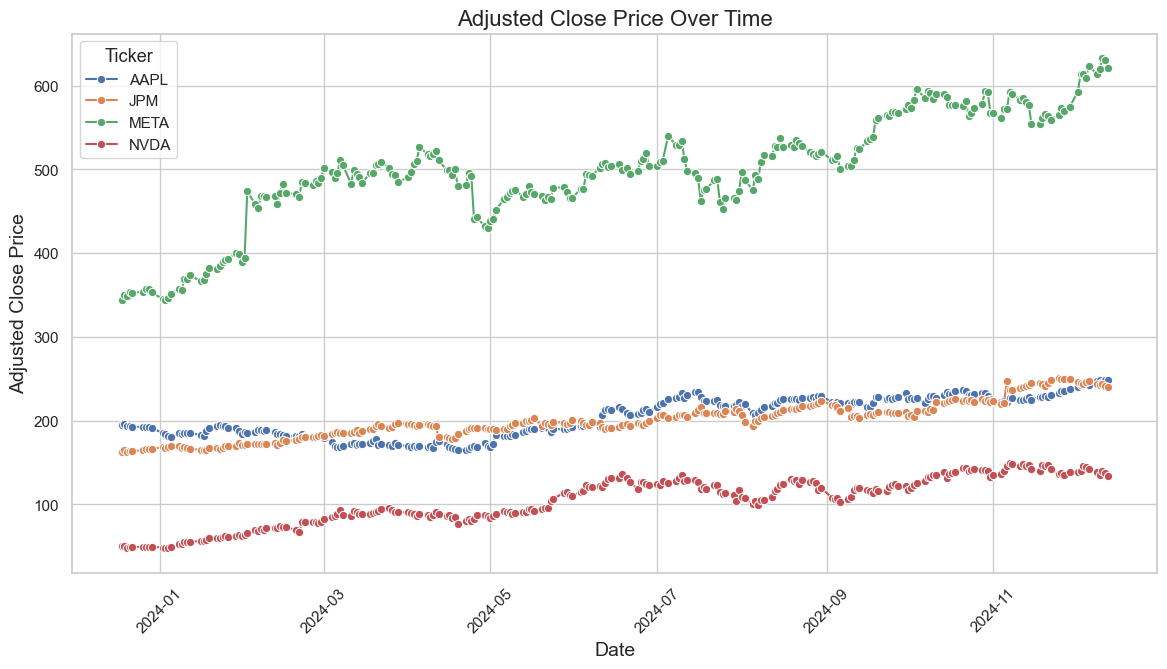

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

stock_data['Date'] = pd.to_datetime(stock_data['Date'])

stock_data.set_index('Date', inplace=True)
stock_data.reset_index(inplace=True)
plt.figure(figsize=(14, 7))
sns.set(style='whitegrid')

sns.lineplot(data=stock_data, x='Date', y='Adj Close', hue='Ticker', marker='o')

plt.title('Adjusted Close Price Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Adjusted Close Price', fontsize=14)
plt.legend(title='Ticker', title_fontsize='13', fontsize='11')
plt.grid(True)

plt.xticks(rotation=45)

plt.show()

# Now, let’s compute the 50-day and 200-day moving averages and plot these along with the Adjusted Close price for each stock:

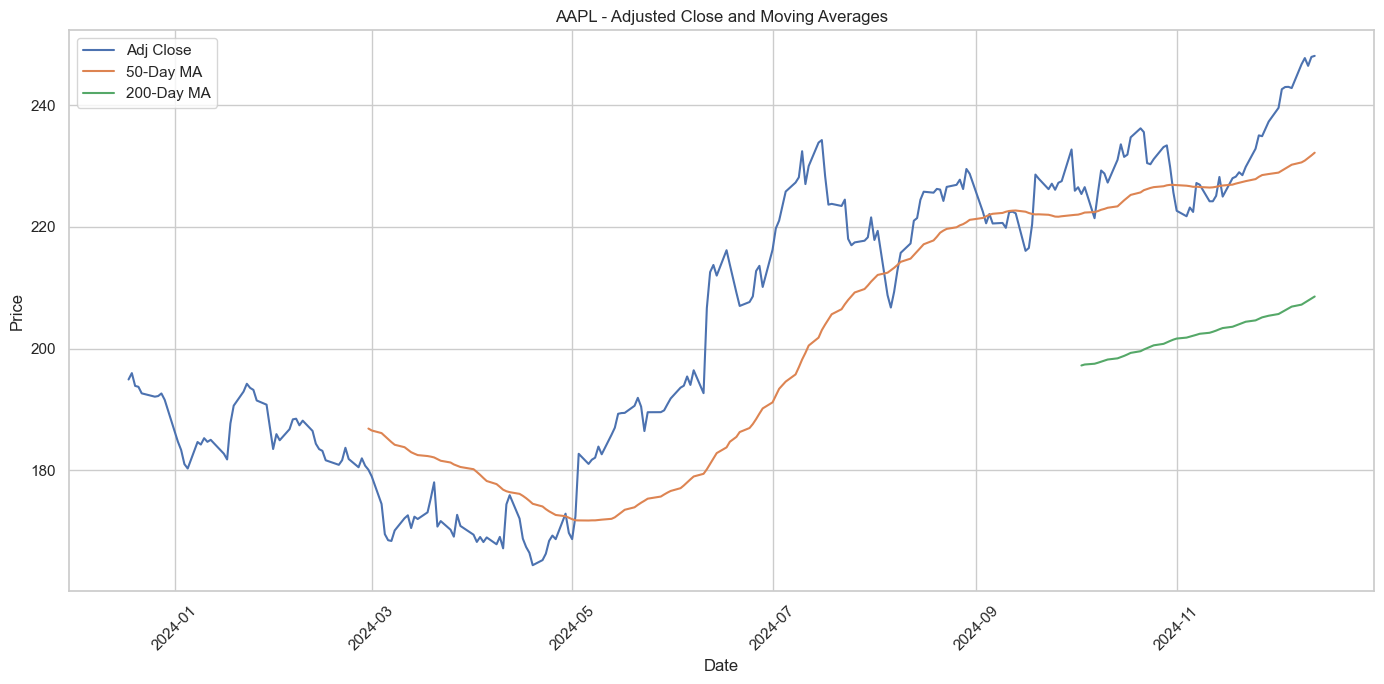

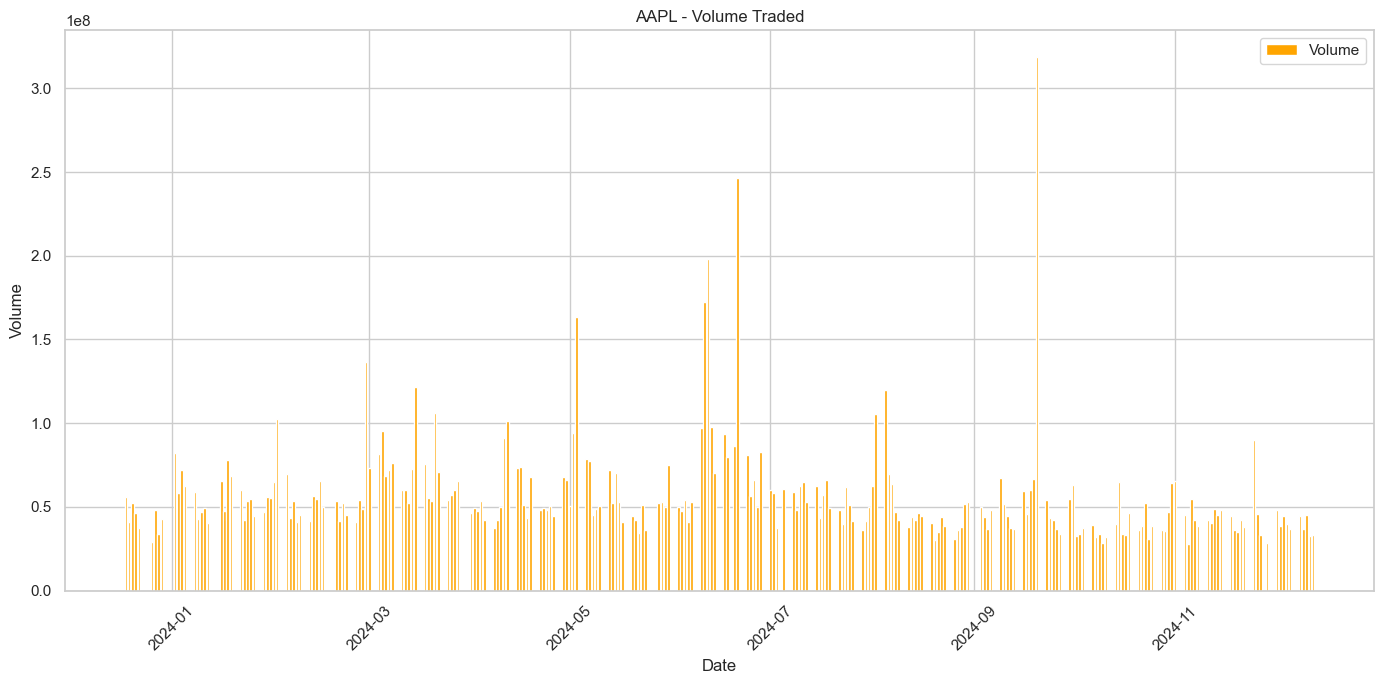

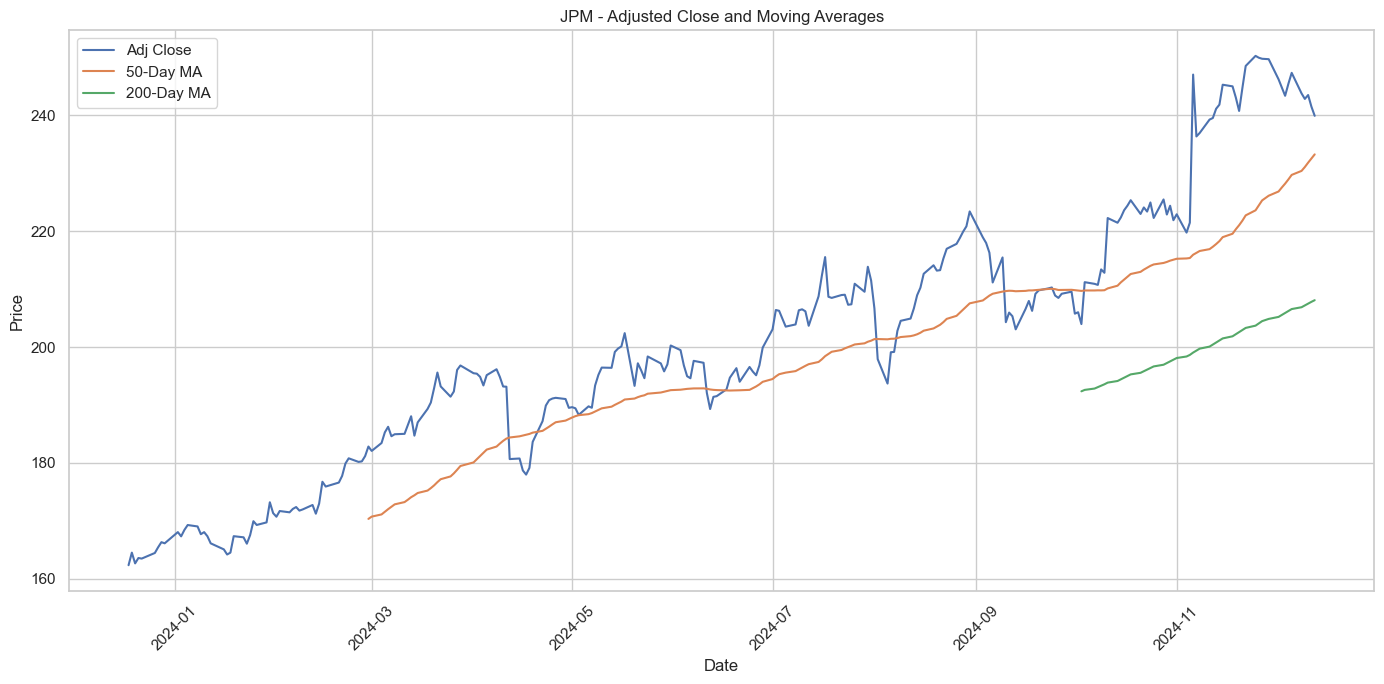

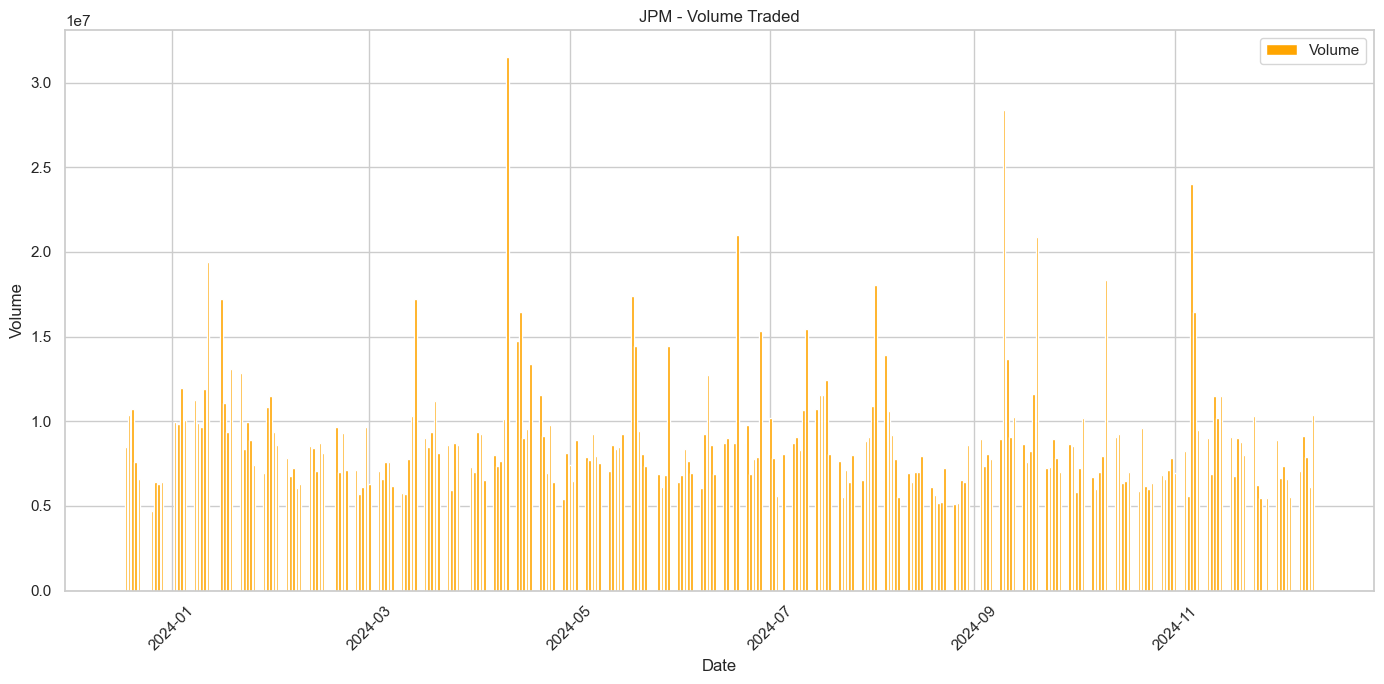

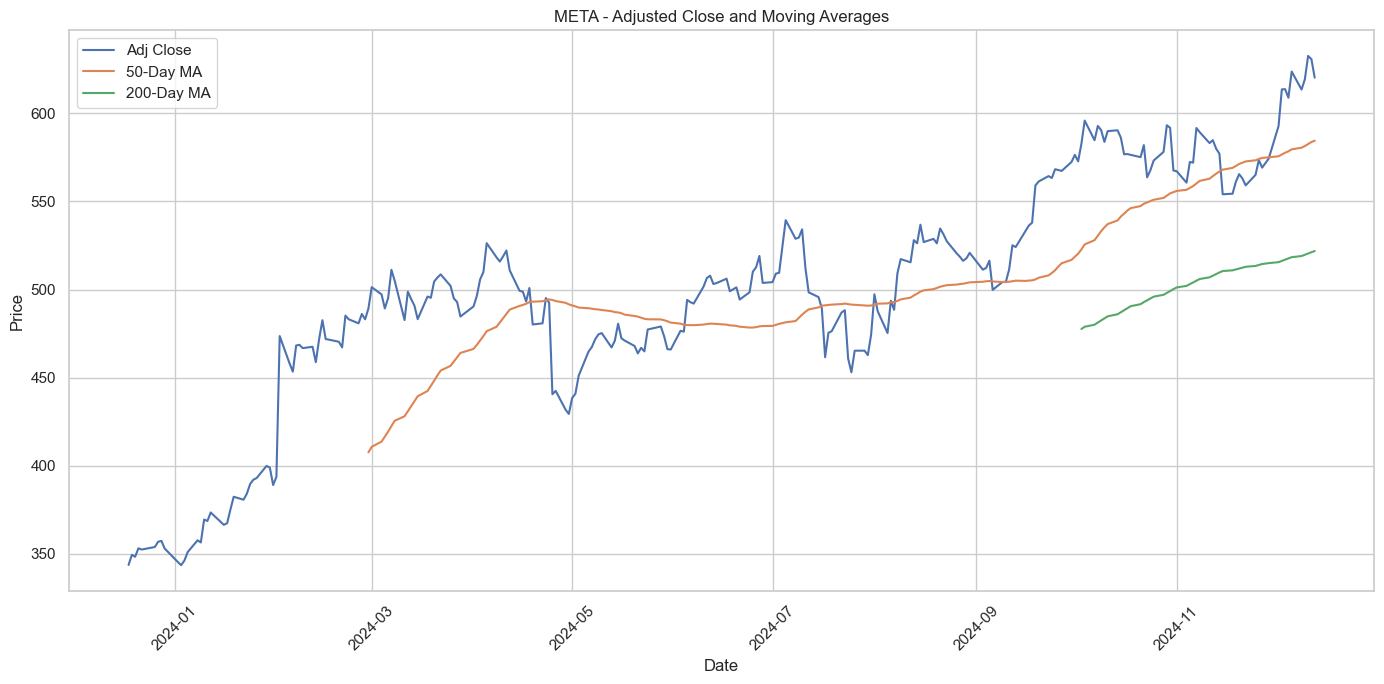

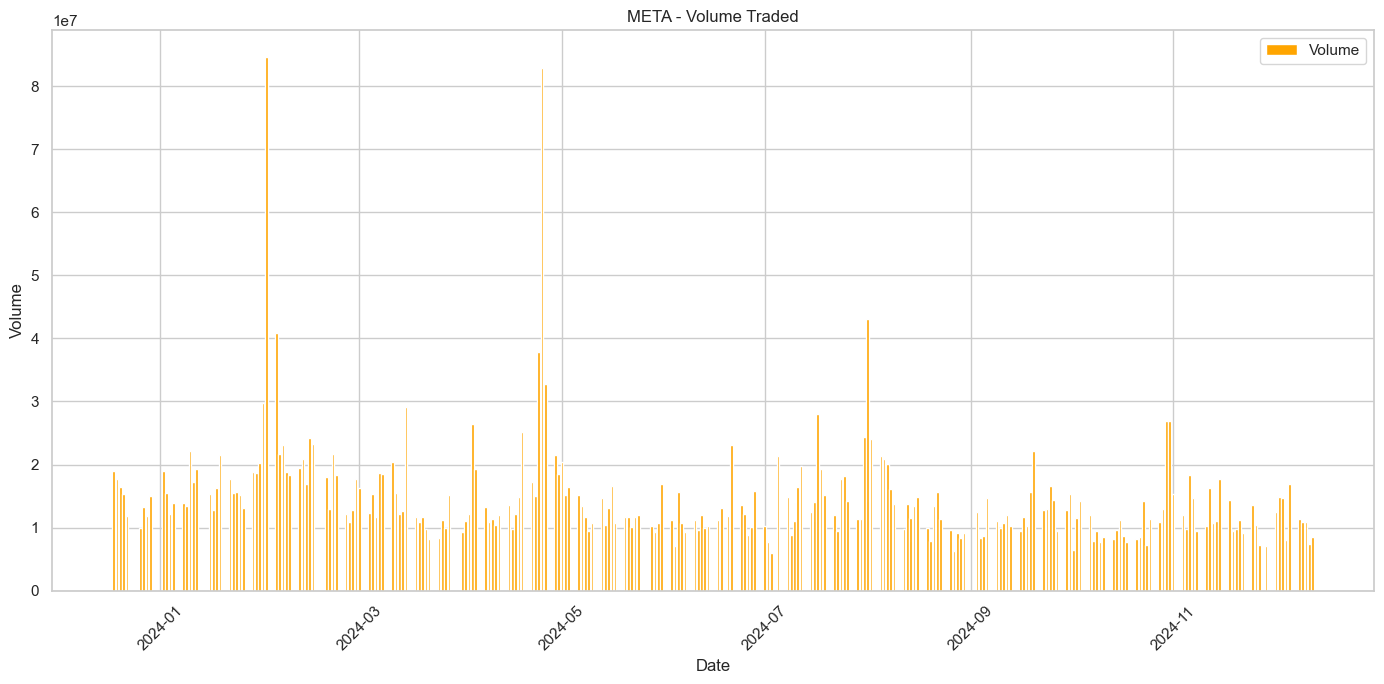

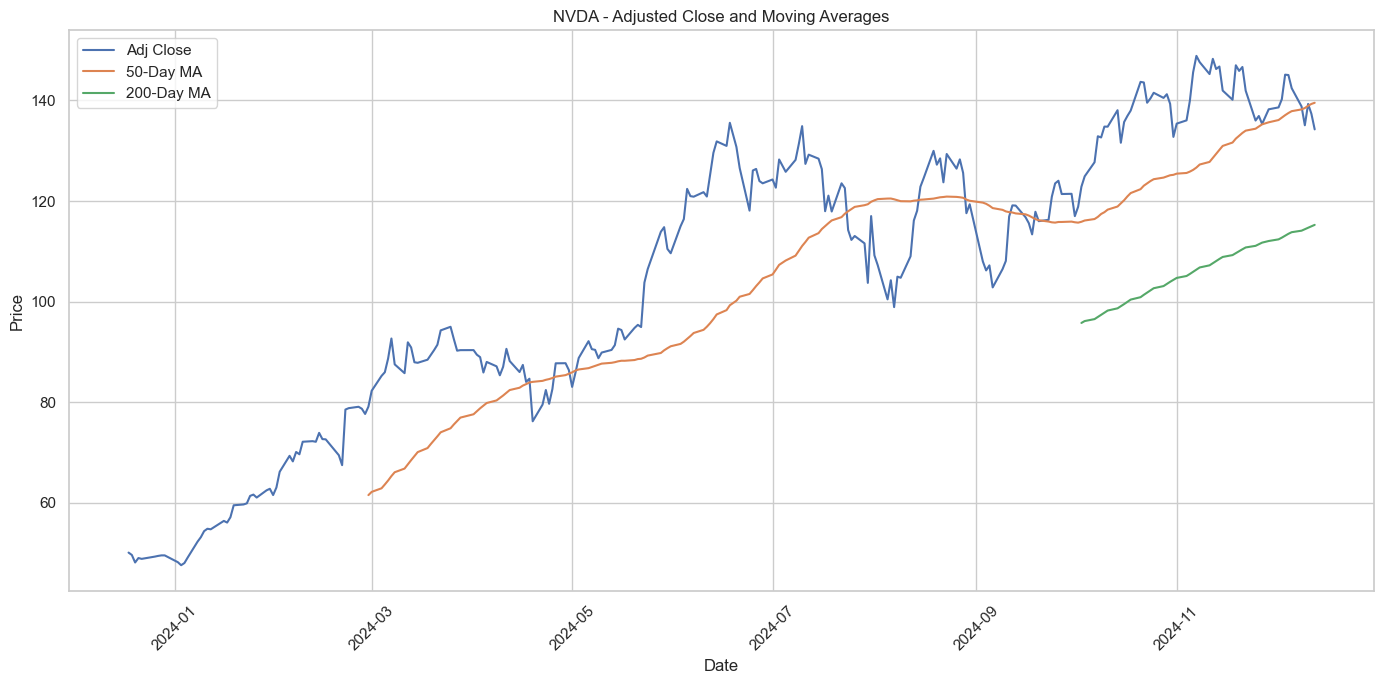

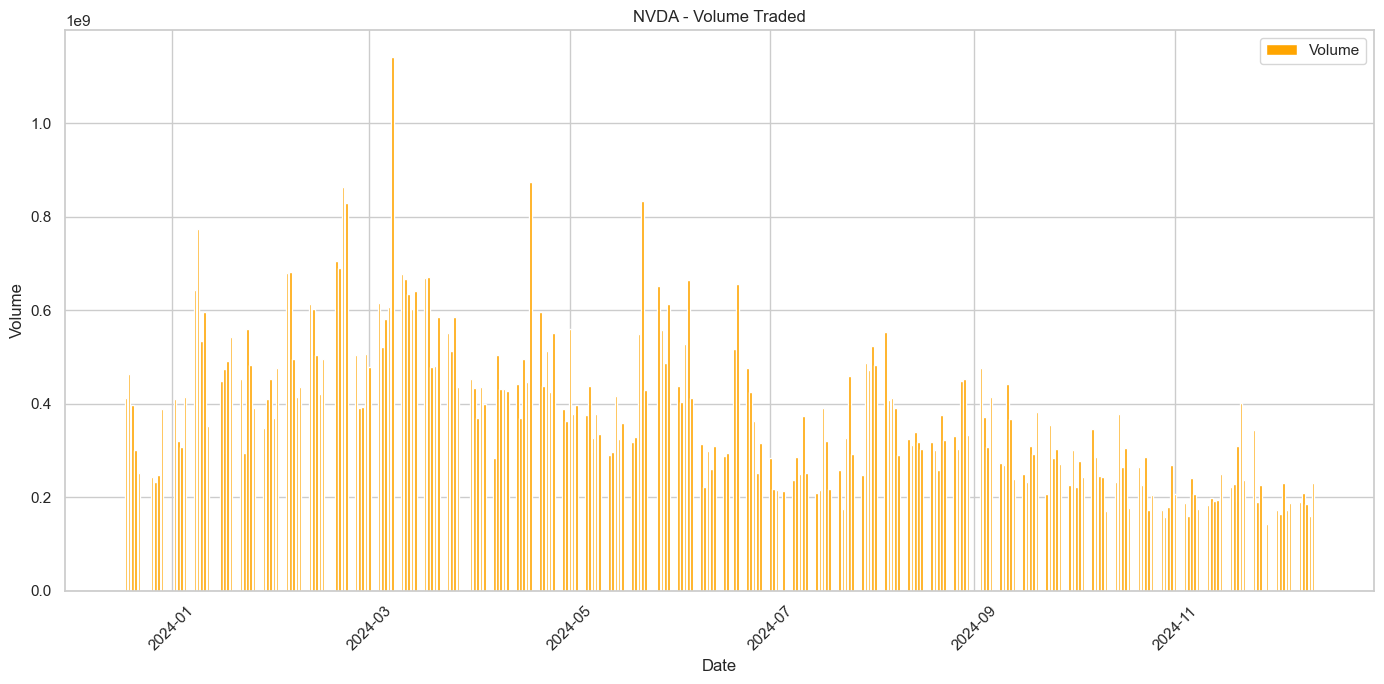

In [63]:
short_window = 50
long_window = 200

stock_data.set_index('Date', inplace=True)
unique_tickers = stock_data['Ticker'].unique()

for ticker in unique_tickers:
    ticker_data = stock_data[stock_data['Ticker'] == ticker].copy()
    ticker_data['50_MA'] = ticker_data['Adj Close'].rolling(window=short_window).mean()
    ticker_data['200_MA'] = ticker_data['Adj Close'].rolling(window=long_window).mean()

    plt.figure(figsize=(14, 7))
    plt.plot(ticker_data.index, ticker_data['Adj Close'], label='Adj Close')
    plt.plot(ticker_data.index, ticker_data['50_MA'], label='50-Day MA')
    plt.plot(ticker_data.index, ticker_data['200_MA'], label='200-Day MA')
    plt.title(f'{ticker} - Adjusted Close and Moving Averages')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(14, 7))
    plt.bar(ticker_data.index, ticker_data['Volume'], label='Volume', color='orange')
    plt.title(f'{ticker} - Volume Traded')
    plt.xlabel('Date')
    plt.ylabel('Volume')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Now, let’s have a look at the distribution of daily returns of these stocks:

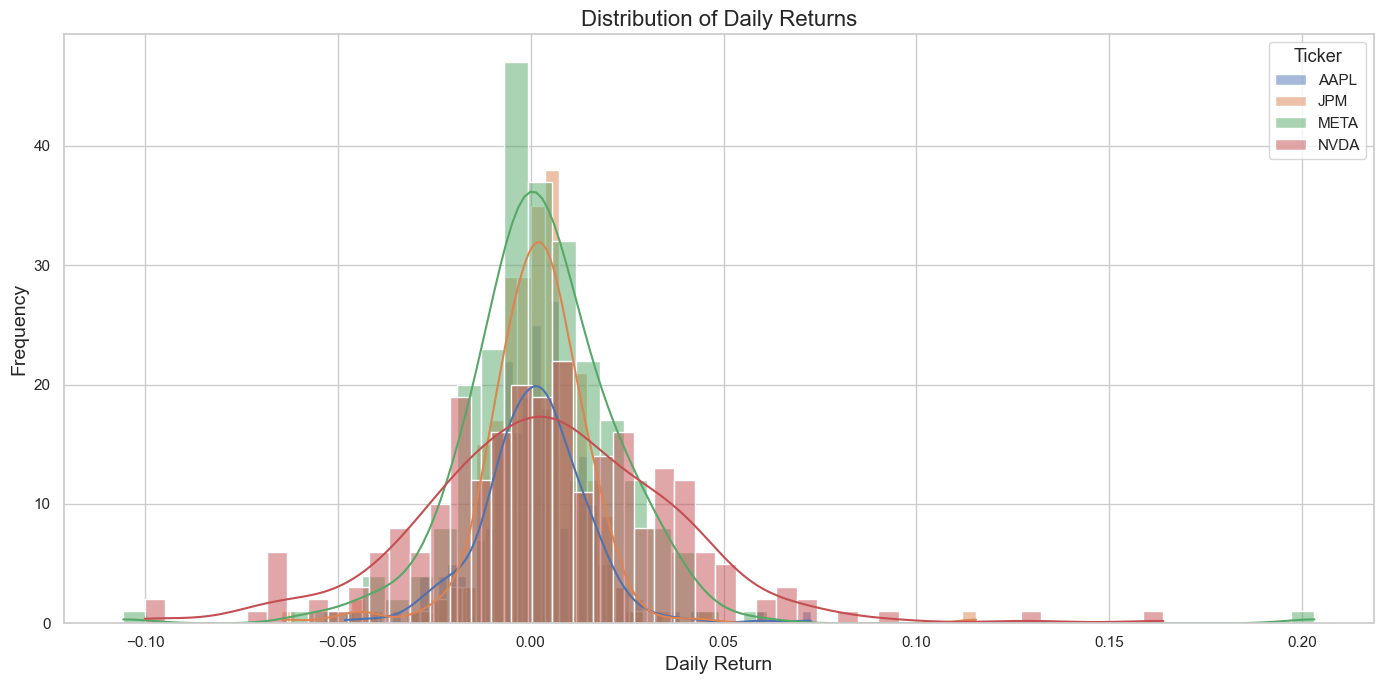

In [66]:
stock_data['Daily Return'] = stock_data.groupby('Ticker')['Adj Close'].pct_change()

plt.figure(figsize=(14, 7))
sns.set(style='whitegrid')

for ticker in unique_tickers:
    ticker_data = stock_data[stock_data['Ticker'] == ticker]
    sns.histplot(ticker_data['Daily Return'].dropna(), bins=50, kde=True, label=ticker, alpha=0.5)

plt.title('Distribution of Daily Returns', fontsize=16)
plt.xlabel('Daily Return', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.legend(title='Ticker', title_fontsize='13', fontsize='11')
plt.grid(True)
plt.tight_layout()
plt.show()

# Now, let’s see if there’s any correlation between all these stocks:

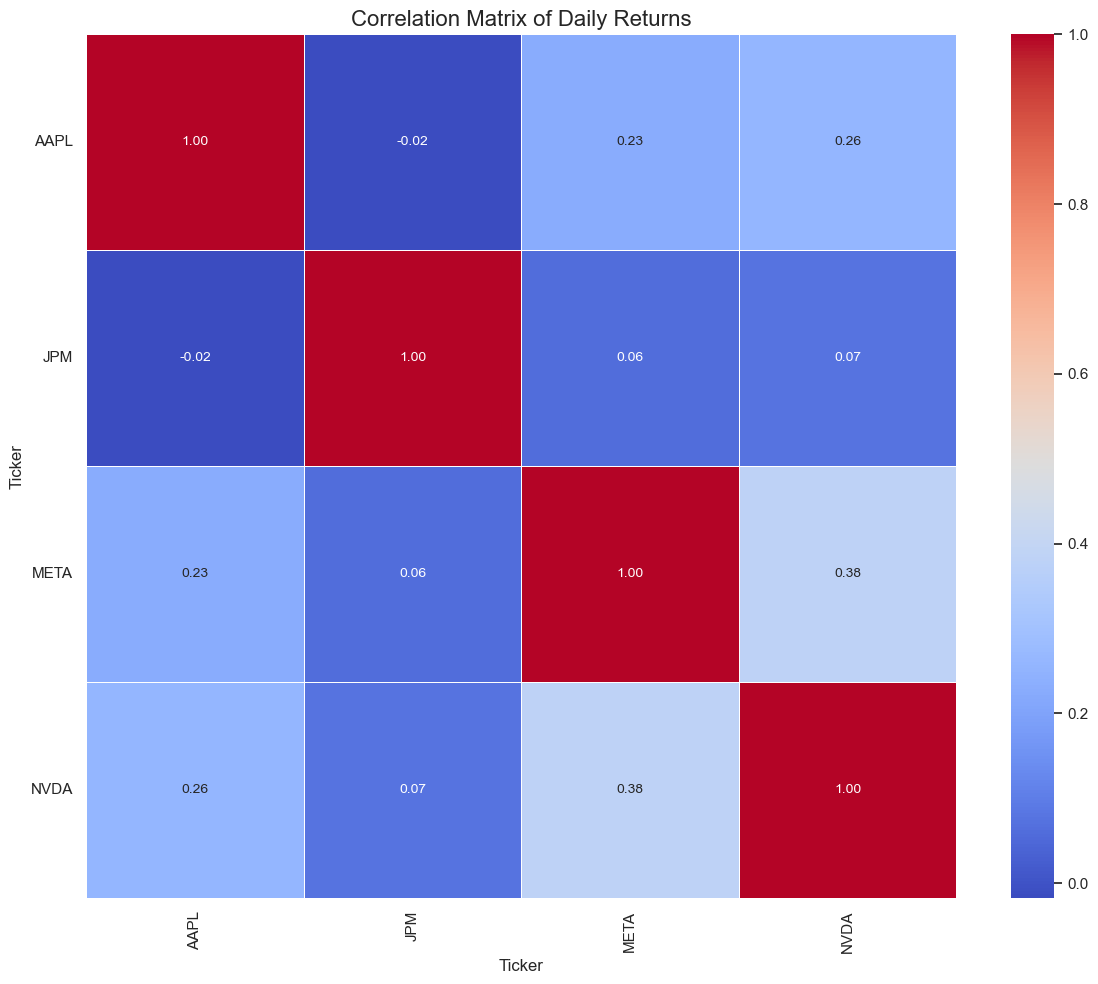

In [69]:
daily_returns = stock_data.pivot_table(index='Date', columns='Ticker', values='Daily Return')
correlation_matrix = daily_returns.corr()

plt.figure(figsize=(12, 10))
sns.set(style='whitegrid')

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5, fmt='.2f', annot_kws={"size": 10})
plt.title('Correlation Matrix of Daily Returns', fontsize=16)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Calculate the expected returns and volatility for each stock

In [72]:
import numpy as np

expected_returns = daily_returns.mean() * 252  # annualize the returns
volatility = daily_returns.std() * np.sqrt(252)  # annualize the volatility

stock_stats = pd.DataFrame({
    'Expected Return': expected_returns,
    'Volatility': volatility
})

stock_stats

,Expected Return,Volatility
Ticker,,
AAPL,0.269417,0.225097
JPM,0.422293,0.232584
META,0.662496,0.363440
NVDA,1.136507,0.525718


# Generate the random portfolios and plot the efficient frontier

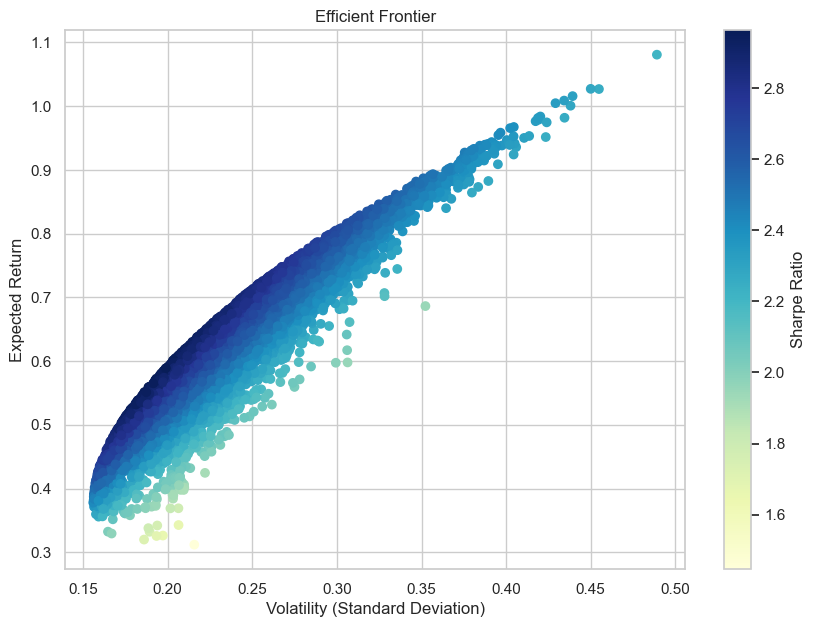

In [78]:
# function to calculate portfolio performance
def portfolio_performance(weights, returns, cov_matrix):
    portfolio_return = np.dot(weights, returns)
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    return portfolio_return, portfolio_volatility

# number of portfolios to simulate
num_portfolios = 10000

# arrays to store the results
results = np.zeros((3, num_portfolios))

# annualized covariance matrix
cov_matrix = daily_returns.cov() * 252

np.random.seed(42)

for i in range(num_portfolios):
    weights = np.random.random(len(unique_tickers))
    weights /= np.sum(weights)

    portfolio_return, portfolio_volatility = portfolio_performance(weights, expected_returns, cov_matrix)

    results[0,i] = portfolio_return
    results[1,i] = portfolio_volatility
    results[2,i] = portfolio_return / portfolio_volatility  # Sharpe Ratio

plt.figure(figsize=(10, 7))
plt.scatter(results[1,:], results[0,:], c=results[2,:], cmap='YlGnBu', marker='o')
plt.title('Efficient Frontier')
plt.xlabel('Volatility (Standard Deviation)')
plt.ylabel('Expected Return')
plt.colorbar(label='Sharpe Ratio')
plt.grid(True)
plt.show()

# The portfolio with the maximum Sharpe ratio has the following characteristics:

In [81]:
max_sharpe_idx = np.argmax(results[2])
max_sharpe_return = results[0, max_sharpe_idx]
max_sharpe_volatility = results[1, max_sharpe_idx]
max_sharpe_ratio = results[2, max_sharpe_idx]

max_sharpe_return, max_sharpe_volatility, max_sharpe_ratio

(0.5589457418381665, 0.18857891529857151, 2.963988529434502)

### Expected Return: 55.89 %
### Volatility: 18.85 %
### Sharpe Ratio: 2.96

# identify the weights of the stocks in the portfolio that yield the maximum Sharpe ratio:

In [85]:
max_sharpe_weights = np.zeros(len(unique_tickers))

for i in range(num_portfolios):
    weights = np.random.random(len(unique_tickers))
    weights /= np.sum(weights)

    portfolio_return, portfolio_volatility = portfolio_performance(weights, expected_returns, cov_matrix)

    if results[2, i] == max_sharpe_ratio:
        max_sharpe_weights = weights
        break

portfolio_weights_df = pd.DataFrame({
    'Ticker': unique_tickers,
    'Weight': max_sharpe_weights
})

portfolio_weights_df

,Ticker,Weight
0,AAPL,0.104841
1,JPM,0.079755
2,META,0.418165
3,NVDA,0.397238
